In [10]:
from utils import get_dataset
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

%matplotlib inline

In [11]:
path = "/home/workspace/data/waymo/**/*.tfrecord"
dataset = get_dataset(path)

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/waymo/**/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/waymo/**/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 100


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [14]:
def display_instances(batch):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    # ADD CODE HERE
    color_map = {1: 'red', 2: 'green', 4: 'blue'}
    fig, ax = plt.subplots() 
    images = batch["image"].numpy()
    ax.imshow(images)
    image_width = images.shape[1]
    image_height = images.shape[0]

    # draw bounding boxes and add color to different class labels
    for box, cla in zip(batch["groundtruth_boxes"].numpy(), batch["groundtruth_classes"].numpy()):
        y1, x1, y2, x2 = box
        y1 *= image_height
        y2 *= image_height
        x1 *= image_width
        x2 *= image_width
        center = (x1, y1)
        #taken from class notes
        width = x2 - x1
        height = y2 - y1
        rec = patches.Rectangle(center, width, height, linewidth=1, edgecolor=color_map[cla], facecolor='none')
        ax.add_patch(rec)
    plt.axis("off")

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

<Figure size 1440x720 with 0 Axes>

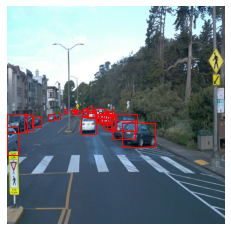

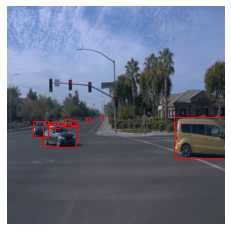

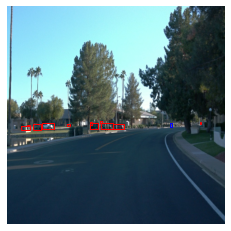

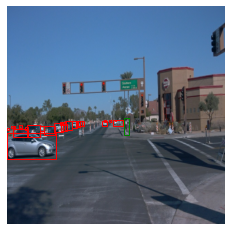

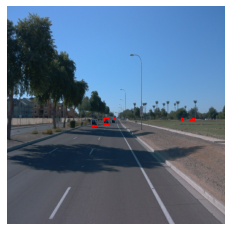

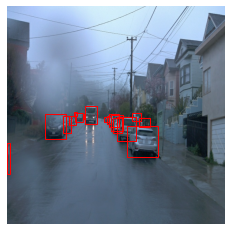

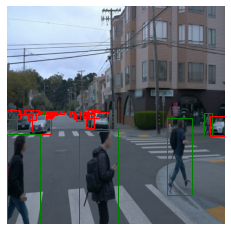

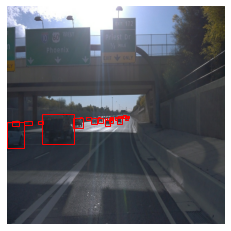

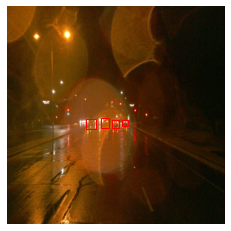

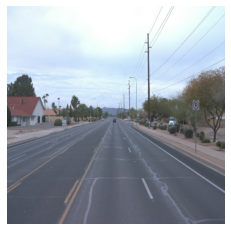

In [15]:
## STUDENT SOLUTION HERE
plt.figure(figsize=(20, 10))
for i in range(10):
    for batch in dataset.take(1):
        display_instances(batch)
plt.show()

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

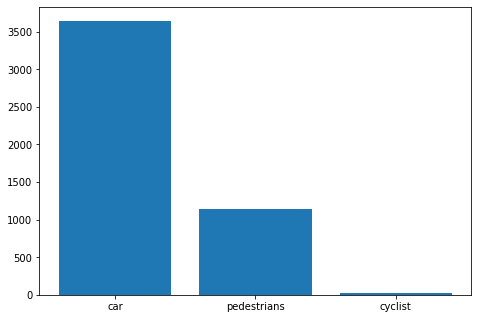

In [21]:
number_dict = {1:0, 2: 0, 4: 0}
for batch in dataset.take(200):
    for l in batch['groundtruth_classes'].numpy():
        number_dict[l] += 1
classes = ["car", "pedestrians", "cyclist"]
number = number_dict.values()
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(classes, number)
plt.show()

In [ ]:
The chart I want to use is in Exploratory Data Analysis.ipynb.
In exploratory analysis section, I checked some images and there are mainly vehicles in the picture with a few cyclists. Also, I drew a graph in the Exploratory Data Analysis.ipynb, and found that there are about 3600 vehicles, 1200 pedestrians, and 100 cyclists. This indicates that our model mainly needs to recognize cars, and since we have little data about cyclists, we may not perform well in term of detecting cyclists. Hence we need more data about cyclists.

Also, I saw some images that were taken in the night. I think we can used data augmentation to convert daytime images into nighttime images by simply decrease it's brightness. This gives us more meaningful data.